# Progetto COVID 2

## Gruppo di lavoro

### Nome del gruppo:
ThetaRangers

### Partecipanti
- Daniele Ferrarelli
- Marco Ferri

# Scopo del progetto

# Dati

In [144]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import math
import matplotlib
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'geopandas'

# Librerie da utilizzare plotly e geopandas

10 dicembre 2020 la turchia si impenna e fumano

In [3]:
#Fetch DataFrame from github csv
URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(URL)

In [5]:
#Format the DataFrame with new confirmed
countries = df['Country/Region'].unique()
days = df.columns[4:]
days_temp = []
list = []

#Convert dates in ISO
for day in days:
    date_obj = datetime.strptime(day, '%m/%d/%y')
    iso_date = date_obj.strftime('%Y-%m-%d')
    days_temp.append([day, iso_date])
    
days = days_temp

#Convert dates to ISO format
for country in countries:
    old_confirmed = math.nan
    for day in days:
        
        #Need sum because there are more states for some country
        sum = df.loc[df['Country/Region'] == country][day[0]].sum()
        newConfirmed = sum-old_confirmed
        
        list.append({"Country" : country, "Date" : day[1], "Confirmed" : sum, "New Confirmed" : newConfirmed if newConfirmed>0 or math.isnan(newConfirmed) else 0 })
        old_confirmed = sum
df = pd.DataFrame(list)
df

,Country,Date,Confirmed,New Confirmed
0,Afghanistan,2020-01-22,0,NaN
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0
...,...,...,...,...
73531,Zimbabwe,2021-02-03,33964,150.0
73532,Zimbabwe,2021-02-04,34171,207.0
73533,Zimbabwe,2021-02-05,34331,160.0
73534,Zimbabwe,2021-02-06,34487,156.0


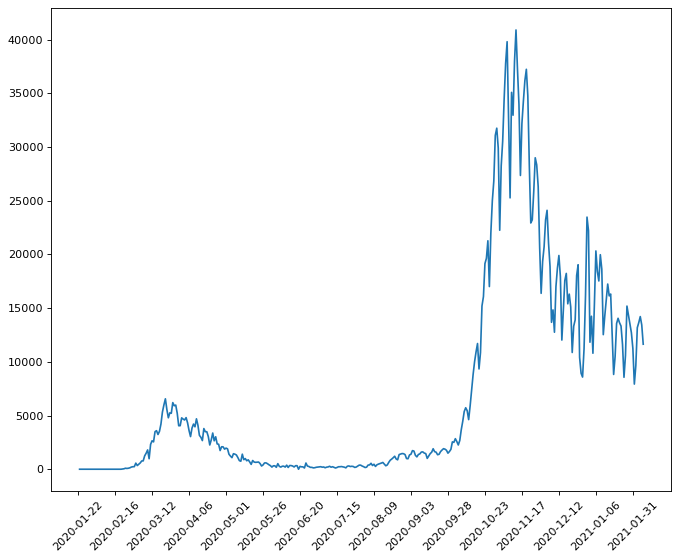

In [8]:
#Plot of one country
country = "Italy"

country = df.loc[df["Country"] == country]
new_confirmed = country["New Confirmed"]
dates = country["Date"]

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plot = plt.plot(dates, new_confirmed)

#Edit x axis label frequency and rotation
plt.xticks(np.arange(0, len(dates)+1, 25), rotation=45)
plt.show()

In [147]:
#Plot of one country new confirmed as function
def newConfirmedPlotting(df, country, figsize=(10,8), xstep=25):
    field = "New Confirmed"
    country = df.loc[df["Country"] == country]
    new_confirmed = country[field]
    dates = country["Date"]

    fig = plt.figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
    plot = plt.plot(dates, new_confirmed)
    plt.xlabel("Date")
    plt.ylabel(field)
    #Edit x axis label frequency and rotation
    plt.xticks(np.arange(0, len(dates)+1, xstep), rotation=45)
    plt.show()

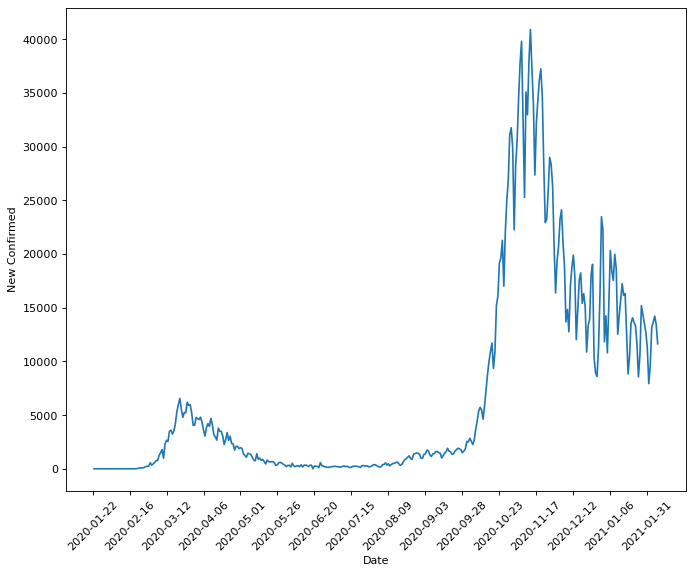

In [148]:
newConfirmedPlotting(df, "Italy")

In [169]:
#Plot of 4 countries
def compare_countries(df, field, countries=["Italy", "France", "Germany", "United Kingdom"], figsize=(10,8), xstep=25):
    if (field not in df.columns):
        print("Field doesn't exists")
        return -1
    elif field not in ["Confirmed", "New Confirmed"]:
        #print("Field exists but you can plot only on Confirmed or New Confirmed")
        print("Invalid field")
        return -1
    
    dates = df["Date"].unique()

    fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.xticks(np.arange(0, len(dates)+1, 10), rotation=45)
    plt.xlabel("Date")
    plt.ylabel(field)

    for country in countries:
        plt.plot(dates, df.loc[df["Country"] == country][field], label=country)

    plt.legend()
    plt.show()

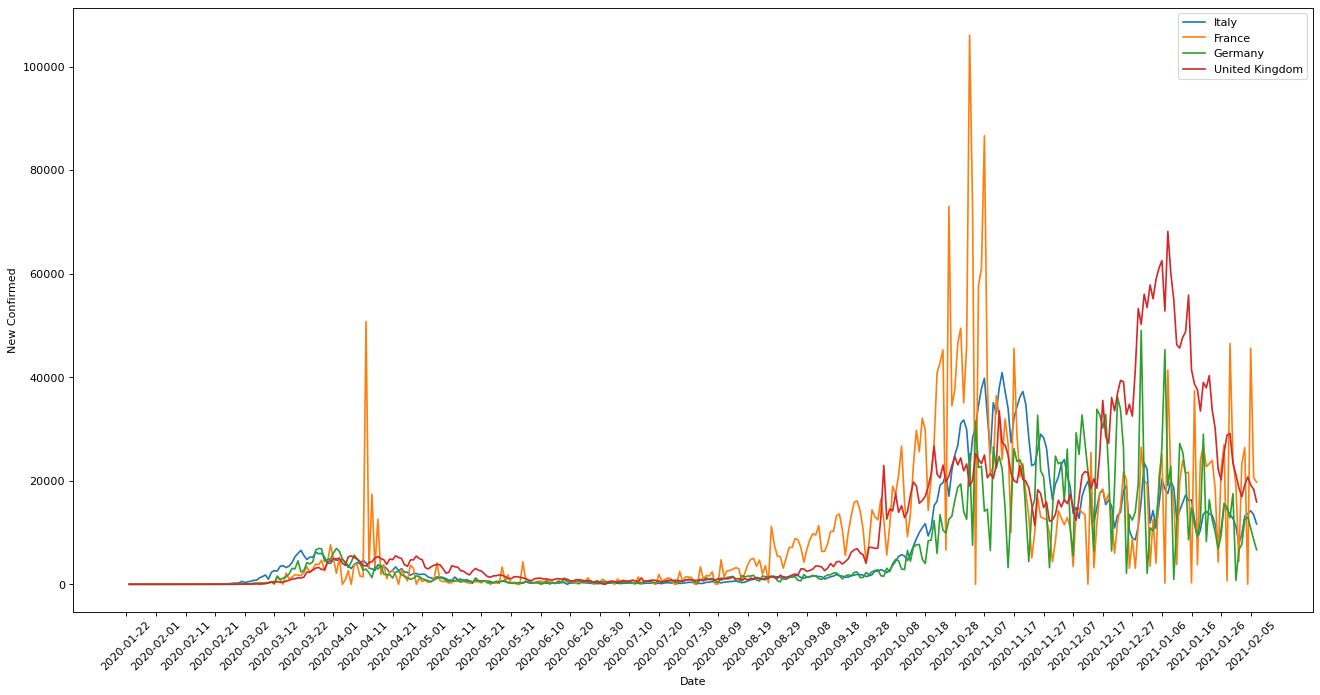

In [173]:
compare_countries(df, "New Confirmed")

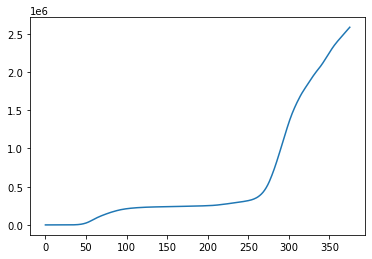

In [16]:
#Rolling Average SMA

confirmed = df.loc[df["Country"] == "Italy"]["Confirmed"]
size = 7
rolling_average = []

#Get first 10
sum = confirmed.iloc[0:size].sum()
rolling_average.append(sum/size)

for x in range(1, len(confirmed)-size):
    sum -=  confirmed.iloc[x-1]
    sum += confirmed.iloc[x+size-1]
    rolling_average.append(sum/size)

plt.plot(rolling_average)
plt.show()

In [150]:
#Rolling Average as function
def rollingAverage(df, field, country, sizes=[7, 14, 21, 28], figsize=(10, 8), xstep=28):
    #check field is valid
    #TODO divide cases or just valid and not valid(?)
    if (field not in df.columns):
        print("Field doesn't exists")
        return -1
    elif field not in ["Confirmed", "New Confirmed"]:
        #print("Field exists but you can plot only on Confirmed or New Confirmed")
        print("Invalid field")
        return -1
    
    country_data = df.loc[df["Country"] == country]
    cases = country_data[field]
    dates = country_data["Date"]
    
    rolling_average = []
    
    for size in sizes:
        avg = cases.rolling(window=size).mean()
        rolling_average.append([avg, size])
        #plt.plot(avg) #just plot without other for
        
    fig = plt.figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
    plt.title("%s %s rolling average" % (country, field))
    plt.xticks(np.arange(0, len(dates)+1, xstep), rotation=45)
    for element, size in rolling_average:
        plt.plot(dates, element, label="Windows size %d" % size)
    
    plt.xlabel("Date")
    plt.ylabel(field)

    plt.legend()
    plt.show()

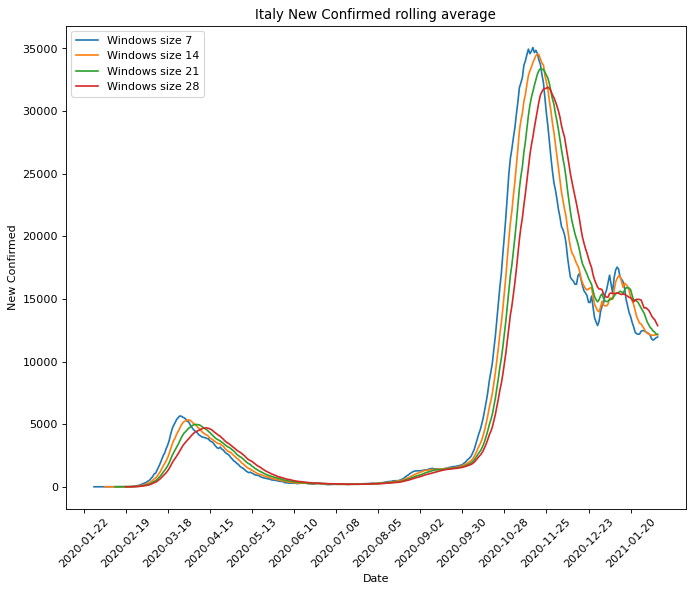

In [160]:
#rollingAverage(df, "New Confirmed", "Italy", [28])
rollingAverage(df, "New Confirmed", "Italy", [7, 14, 21, 28])

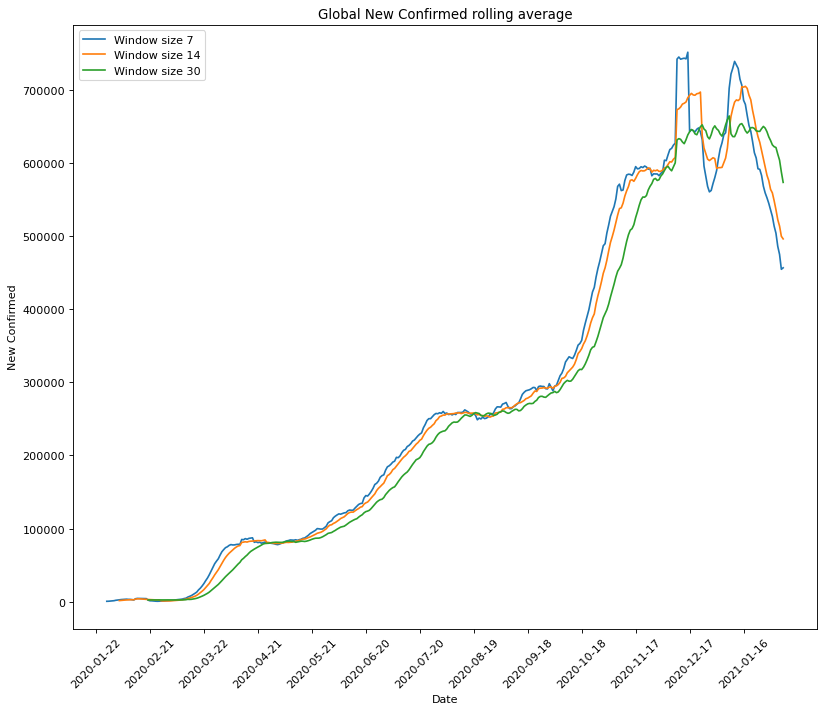

In [154]:
globalData(df, "New Confirmed", [7, 14, 30])

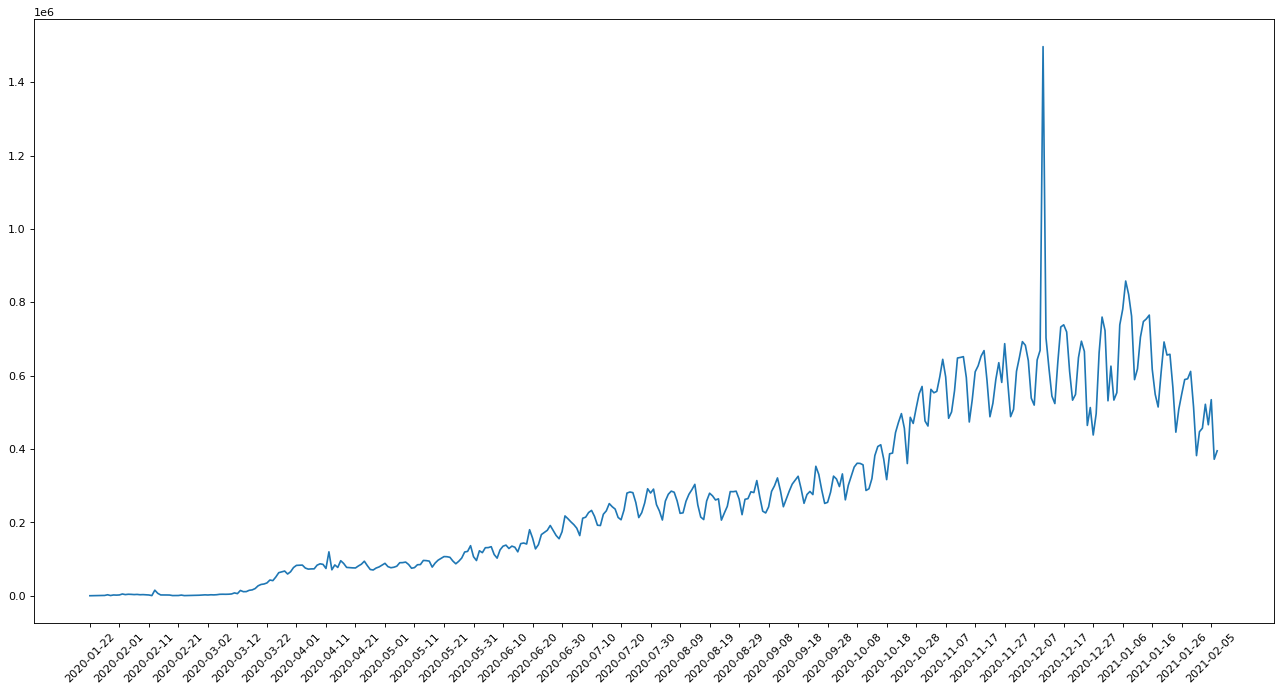

In [40]:
#Global data
days = df["Date"].unique()
global_cases = []

for day in days:
    cases = df.loc[df["Date"] == day]["New Confirmed"].sum()
    global_cases.append(cases)

fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xticks(np.arange(0, len(dates)+1, 10), rotation=45)
plt.plot(days, global_cases)
plt.show()

In [28]:
df.loc[df["New Confirmed"].argmax()]

Country              Turkey
Date             2020-12-10
Confirmed           1748567
New Confirmed        823225
Name: 68114, dtype: object

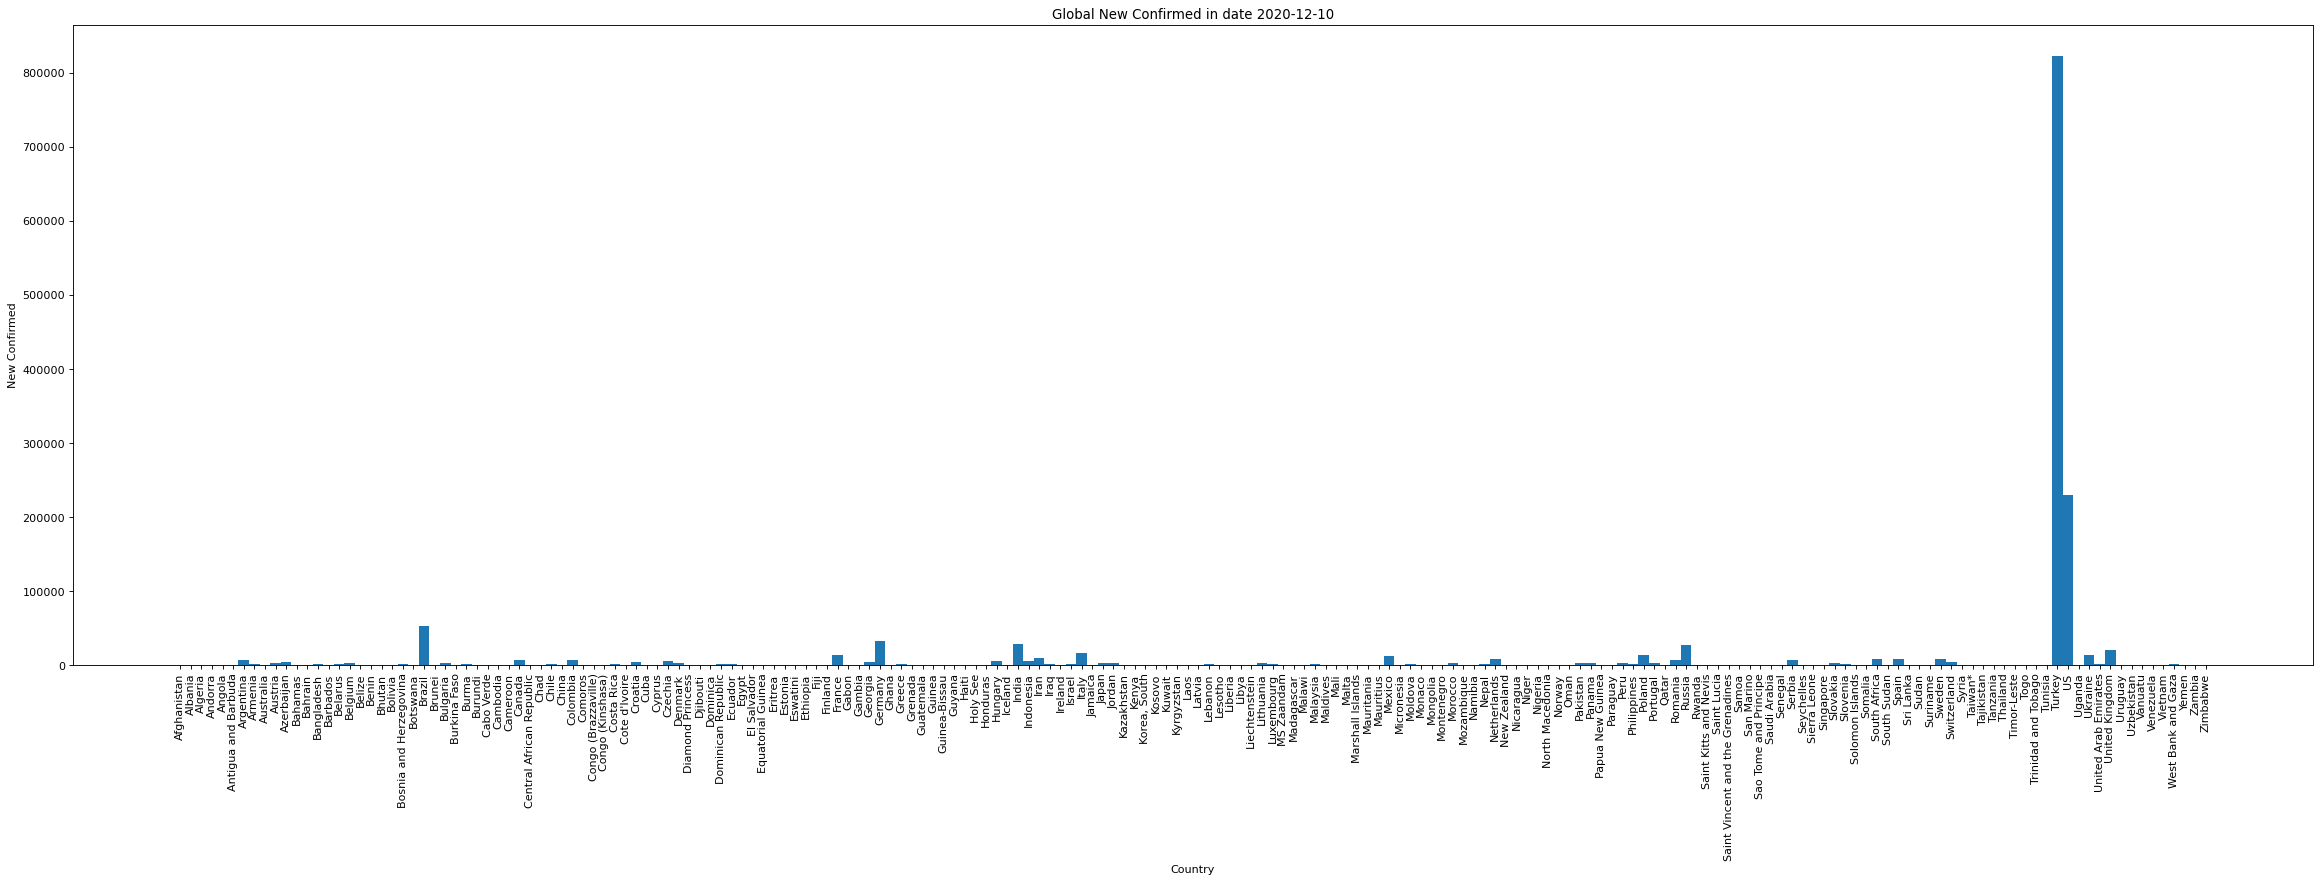

In [158]:
#Bar graph for global cases in a single date
date = "2020-12-10"
field = "New Confirmed"

df_filtered = df.loc[df["Date"] == date]
countries = df_filtered["Country"]

fig = plt.figure(num=None, figsize=(35, 10), dpi=80, facecolor='w', edgecolor='k')
width = 3

#TODO aggiungere titoli agli assi

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.bar(range(0, len(countries) * width, width), df_filtered[field], width=width, align='center')
ax.set_xticklabels(df_filtered["Country"], rotation=90)

ax.set_xlabel("Country")
ax.set_ylabel(field)
ax.set_xticks(range(0, len(countries) * width, width))
ax.set_title("Global %s in date %s" % (field, date))
plt.show()